# Fast Fourier Transform (FFT)

- DFT is slow.


- FFT is an algorithm that computes the discrete Fourier transform (DFT) of a sequence, or its inverse (IDFT).


- FFT exploits symmetries of the DFT to output results in a fraction of the time:

$$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}$$

we can calculate the 
 
$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}$$

Note that, $e^{-i2\pi{n}} = 1$, therefore, we have 

$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k$$

Thus, we can have:

$$X_{k+i\cdot N} = X_k, \text{ for any integer i}$$

This means that within the DFT, we have symmetries that we can use to reduce the computation. 


- Fourier analysis converts a signal from its original domain (often time or space) to a representation in the (temporal or spatial) frequency domain and vice versa.


- The DFT is obtained by decomposing a sequence of values into components of different frequencies. Computing it directly from the definition is often too slow to be practical.

**References:**

https://en.wikipedia.org/wiki/Fast_Fourier_transform

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html


### 1. DFT is slow:

Apply the DFT to a cosine function that accepts different sampling rates:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DFT_function(signal):
    
    N = len(signal)
    
    n = np.arange(0,N)
    
    k = n.reshape((N, 1))
    
    exp_term = np.exp(-2j*np.pi*k*n/N)
    
    chi = np.dot(exp_term, signal)
    
    return chi

In [3]:
def cos_function(sampling_rate):
    
    t_sampling = 1.0/sampling_rate
    
    t = np.arange(0, 1.0, t_sampling)
    
    freq = 1.
    
    signal = np.cos(2*np.pi*freq*t)
    
    return t, signal

In [4]:
# Call the X and Y vectors:

sr1 = 10
sr2 = 100
sr3 = 1000

xx1, yy1 = cos_function(sr1)

xx2, yy2 = cos_function(sr2)

xx3, yy3 = cos_function(sr3)


### Plotting:

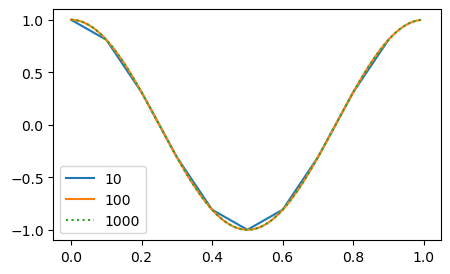

In [6]:
plt.figure(figsize=(5,3))

plt.plot(xx1, yy1, label = "10")
plt.plot(xx2, yy2, label = "100")
plt.plot(xx3, yy3, linestyle= ":",  label = "1000")

plt.legend()
plt.show()

### Measuring execution time

%timeit:

https://docs.python.org/3/library/timeit.html

In [7]:
%timeit DFT_function(yy1) # for sampling rate 1 - sr1 = 10
%timeit DFT_function(yy2) # for sampling rate 2 - sr2 = 100
%timeit DFT_function(yy3) # for sampling rate 3 - sr3 = 1000

4.24 µs ± 30.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
204 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.6 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2. FFT algorithm:




- An FFT rapidly computes such transformations by Matrix decomposition, i.e. the DFT matrix into a product of Sparse matrix (mostly zero) factors. As a result, it manages to reduce the computational complexity of computing the DFT from $O\left(N^2\right)$, which arises if one simply applies the definition of DFT, to $O(N \log N)$, where $N$ is the data size.


If we need to calculate both $X_k$ and $X_{k+N}$, we only need to do this once. This is exactly the idea behind the FFT. Cooley and Tukey showed that we can calculate DFT more efficiently if we continue to divide the problem into smaller ones. Let's first divide the whole series into two parts, i.e. the even number part and the odd number part:

\begin{eqnarray*}
X_{k} &=& \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{eqnarray*}

The two smaller terms which only have half of the size ($\frac{N}{2}$) in the above equation are two smaller DFTs. For each term, the $ 0\leq m \le \frac{N}{2}$, but $ 0\leq k \le N$, therefore, we can see that half of the values will be the same due to the symmetry properties we described above. Thus, we only need to calculate half of the fields in each term. Of course, we don't need to stop here, we can continue to divide each term into half with the even and odd values until it reaches the last two numbers, then calculation will be really simple. 

This is how FFT works using this recursive approach.


- The difference in speed can be enormous, especially for long data sets where ''N'' may be in the thousands or millions. In the presence of round-off error, many FFT algorithms are much more accurate than evaluating the DFT definition directly or indirectly.

#### This is for understading the FFT implementation:

In [9]:
# Generate even and odd series

x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

x_even = x[::2]
print(x_even)

x_odd = x[1::2]
print(x_odd)

[0 2 4 6]
[1 3 5 7]


In [11]:
# Concatanate:

a = np.array([[1, 2],[3, 4]])

b = np.array([[5, 6],[7, 8]])

print(a)
print(b)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [14]:
c1 = np.concatenate([a, b], axis= 1)

c2 = np.concatenate([a, b], axis= 0)

c3 = np.concatenate([a, b])

print(c1)
print("")
print(c2)
print("")
print(c3)

[[1 2 5 6]
 [3 4 7 8]]

[[1 2]
 [3 4]
 [5 6]
 [7 8]]

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


\begin{eqnarray*}
X_{k} &=& \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{eqnarray*}

In [8]:
def FFT_function(signal):
    
    N = len(signal)
    
    if N == 1:
        return signal
    
    else:
        
        X_even = FFT_function(signal[::2])
        
        X_odd  = FFT_function(signal[1::2])
        
        k = np.arange(N)
        e_factor = np.exp(-2j*np.pi*k / N)
        
        X_k = np.concatenate([X_even + e_factor[:int(N/2)]*X_odd, X_even + e_factor[int(N/2):]*X_odd])
        
        return X_k
    

## Example:

(a) Generate 3 sine waves with frequencies $1\rm Hz$, $5 Hz$, and $8 Hz$, amplitudes $4$, $2$ and $0.25$, and phase all zeros.

(b) Plot this $3$ sine waves together with a sampling rate $128 Hz$.

(c) Calculate the DFT and the FFT of the resulting signal and return the DFT values.

In [19]:
def sine_wave(amp, freq, t):
    # amp  = amplitude
    # freq = frequency
    # t    = time_axis
    
    return amp*np.sin(2*np.pi*freq*t)

In [20]:
# sampling rate
s_rate = 128 #Hz

# sampling interval
a = 0.0
b = 1.0
s_interval = (b - a)/s_rate

# t_axis
t = np.arange(a, b, s_interval)

# y axis
signal_3 = sine_wave(4,1,t) + sine_wave(2,5,t) + sine_wave(0.25,8,t)

### Plotting:


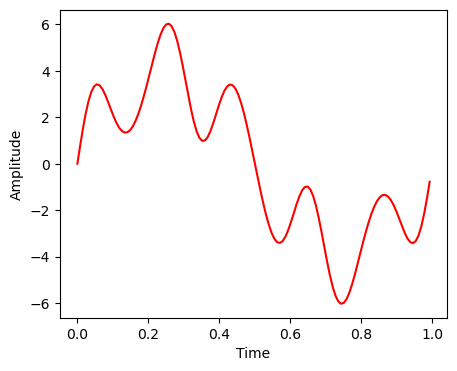

In [21]:
plt.figure(figsize = (5, 4))
plt.plot(t, signal_3, 'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

### Fourier:

In [24]:
fourier_s3 = FFT_function(signal_3)

#print(fourier_s3)

### Calculating frequencies:


In [25]:
# calculate the frequency
N3 = len(fourier_s3)
n3 = np.arange(N3)
T3 = N3/s_rate
freq3 = n3/T3 

### Fourier plot:

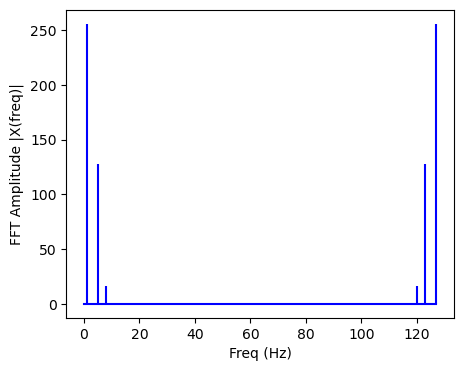

In [26]:
plt.figure(figsize = (5, 4))
plt.stem(freq3, abs(fourier_s3), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

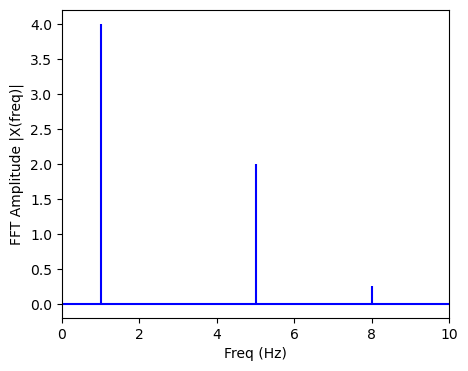

In [29]:
plt.figure(figsize = (5, 4))
plt.stem(freq3[:N3//2], abs(fourier_s3)[:N3//2]/(N3//2), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.xlim(0,10)
plt.show()

### IMPORTANT: Normalisation -> correct amplitudes

In [30]:
A = abs(fourier_s3)[:N3//2]/(N3//2)

In [31]:
A[:]

array([4.37788092e-17, 4.00000000e+00, 2.32096726e-16, 1.47289908e-16,
       1.49779608e-16, 2.00000000e+00, 3.31367953e-16, 2.10743052e-16,
       2.50000000e-01, 8.12565031e-17, 1.60915222e-16, 1.42607252e-16,
       3.57934559e-16, 1.19276400e-16, 1.92557517e-16, 5.12384361e-16,
       6.49473587e-17, 1.39064836e-16, 1.93583648e-16, 7.07361881e-17,
       2.94169405e-16, 2.15281122e-16, 5.78724785e-17, 1.75985542e-16,
       1.82574339e-16, 3.04229608e-16, 2.83858944e-16, 1.18554683e-16,
       3.86895113e-16, 3.99130203e-16, 4.17831390e-16, 5.45272080e-16,
       1.69578165e-16, 2.51537663e-16, 2.69230076e-16, 6.94955874e-17,
       2.37580055e-16, 9.60066907e-17, 3.77154072e-16, 5.99407976e-16,
       3.59051168e-16, 1.50286776e-16, 7.38105142e-17, 4.60169043e-17,
       9.21510204e-17, 5.57630375e-17, 2.73016709e-16, 3.44577577e-16,
       3.31887690e-16, 1.27503184e-16, 2.48806992e-16, 2.03810272e-16,
       6.86617033e-17, 7.22194120e-17, 2.68063978e-16, 2.80698116e-16,
      

## Comparisons between DFT and FFT:

We go back to the initial problem wwith a cosine function with different sampling rates:

In [15]:
def cos_function(sampling_rate):
    
    t_sampling = 1.0/sampling_rate
    t = np.arange(0,1,t_sampling)

    freq = 1.
    signal = np.cos(2*np.pi*freq*t)
    
    return signal

In [16]:
sr4 = 4096

In [17]:
%timeit DFT_function(cos_function(sr4)) # for sampling rate 4 - sr4 = 2048
%timeit FFT_function(cos_function(sr4)) # for sampling rate 4 - sr4 = 2048

256 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.8 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
DFT_time = sr4**2
FFT_time = sr4*np.log10(sr4)

ratio = DFT_time/FFT_time

print(ratio)

1133.884789721553


### Inverse Fourier transform

In [32]:
signal_invF = np.fft.ifft(fourier_s3)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


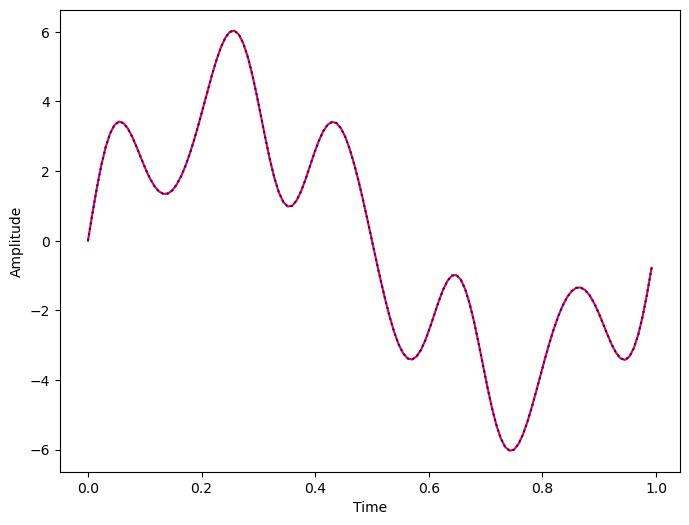

In [33]:
plt.figure(figsize = (8, 6))
plt.plot(t, signal_invF, 'r')
plt.plot(t, signal_3, 'b', linestyle = ':')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()